In [78]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [151]:
from flask import Flask, jsonify


In [81]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [82]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [83]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table
measurementTable = Base.classes.measurement
stationTable = Base.classes.station

In [85]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [86]:
# let's find out what's inside
inspector = inspect(engine)

In [87]:
# what's a measurement
msrColumns = inspector.get_columns('measurement')
msrColumns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [88]:
# what's a station?
stnColumns = inspector.get_columns('station')
stnColumns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [89]:
# Find the most recent date in the data set.
recentSorted = session.query(measurementTable.date).order_by(measurementTable.date.desc())
mostRecent = recentSorted.first()
print(mostRecent)

('2017-08-23',)


In [90]:
type(mostRecent)

sqlalchemy.engine.row.Row

In [91]:
mostRecent[0]

'2017-08-23'

In [92]:
type(mostRecent[0])

str

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
mostRecentDt = dt.datetime.strptime(mostRecent[0], '%Y-%m-%d')
mostRecentDt

datetime.datetime(2017, 8, 23, 0, 0)

In [94]:
# Calculate the date one year from the last date in data set.
yearAgo = mostRecentDt - dt.timedelta(365)
print(yearAgo)

2016-08-23 00:00:00


In [156]:
# Perform a query to retrieve the data and precipitation scores
lastYearPrecip = session.query(measurementTable.date, measurementTable.prcp).\
        filter(measurementTable.date >= yearAgo).all()
lastYearPrecipList = []

for date, prcp in lastYearPrecip:
        precipRow = {}
        precipRow["date"] = date
        precipRow["prcp"] = prcp
        lastYearPrecipList.append(precipRow)

In [157]:
lastYearPrecipList

[{'date': '2016-08-24', 'prcp': 0.08},
 {'date': '2016-08-25', 'prcp': 0.08},
 {'date': '2016-08-26', 'prcp': 0.0},
 {'date': '2016-08-27', 'prcp': 0.0},
 {'date': '2016-08-28', 'prcp': 0.01},
 {'date': '2016-08-29', 'prcp': 0.0},
 {'date': '2016-08-30', 'prcp': 0.0},
 {'date': '2016-08-31', 'prcp': 0.13},
 {'date': '2016-09-01', 'prcp': 0.0},
 {'date': '2016-09-02', 'prcp': 0.0},
 {'date': '2016-09-03', 'prcp': 0.0},
 {'date': '2016-09-04', 'prcp': 0.03},
 {'date': '2016-09-05', 'prcp': None},
 {'date': '2016-09-06', 'prcp': None},
 {'date': '2016-09-07', 'prcp': 0.05},
 {'date': '2016-09-08', 'prcp': 0.0},
 {'date': '2016-09-09', 'prcp': 0.03},
 {'date': '2016-09-10', 'prcp': 0.0},
 {'date': '2016-09-11', 'prcp': 0.05},
 {'date': '2016-09-12', 'prcp': 0.0},
 {'date': '2016-09-13', 'prcp': 0.02},
 {'date': '2016-09-14', 'prcp': 1.32},
 {'date': '2016-09-15', 'prcp': 0.42},
 {'date': '2016-09-16', 'prcp': 0.06},
 {'date': '2016-09-17', 'prcp': 0.05},
 {'date': '2016-09-18', 'prcp': 0.0

In [154]:
precipRaveled = list(np.ravel(lastYearPrecip))
# print(jsonify(precipRaveled))


In [98]:
# Save the query results as a Pandas DataFrame and set the index to the date column
lastYearPrecipDf = pd.DataFrame(lastYearPrecip)

lastYearPrecipDf.columns = ['date', 'prcp']
lastYearPrecipDf = lastYearPrecipDf.set_index("date")
lastYearPrecipDf.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [99]:
# Sort the dataframe by date
lastYearPrecipDf.sort_values(by=['date'])
lastYearPrecipDf.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


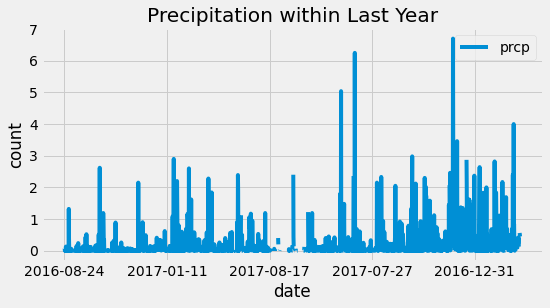

In [100]:
# Use Pandas Plotting with Matplotlib to plot the data
lastYearPlot = lastYearPrecipDf.plot(figsize=(8,4))
lastYearPlot.set_title("Precipitation within Last Year")
lastYearPlot.set_ylabel('count')
plt.show()

In [102]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastYearPrecipDf.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [105]:
# Design a query to calculate the total number stations in the dataset
maxStations = session.query(measurementTable).group_by(measurementTable.station).count()
maxStations

9

In [135]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostActiveStations = session.query(measurementTable.station, func.count(measurementTable.station)).\
            group_by(measurementTable.station).\
            order_by(func.count(measurementTable.station).desc()).all()
mostActiveStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [161]:
testy = session.query(measurementTable.station).all()
            
testy

('USC00519397',)

In [137]:
# most active station id
mostActiveStation = mostActiveStations[0][0]
mostActiveStation

'USC00519281'

In [138]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tmp = [func.min(measurementTable.tobs),
       func.max(measurementTable.tobs),
       func.avg(measurementTable.tobs)]
                
session.query(*tmp).filter(measurementTable.station==mostActiveStation).all()

[(54.0, 85.0, 71.66378066378067)]

In [140]:
# most active tobs from the last year of data, utilizing previously generated vars
lastYearMostAciveTobs = session.query(measurementTable.tobs).\
                                filter(measurementTable.station==mostActiveStation).\
                                filter(measurementTable.date >= yearAgo).\
                                order_by(measurementTable.date.desc()).all()
lastYearMostAciveTobs

[(79.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (83.0,),
 (82.0,),
 (77.0,),
 (76.0,),
 (81.0,),
 (82.0,),
 (81.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (75.0,),
 (82.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (80.0,),
 (76.0,),
 (74.0,),
 (74.0,),
 (72.0,),
 (69.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (81.0,),
 (79.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (71.0,),
 (77.0,),
 (72.0,),
 (72.0,),
 (74.0,),
 (72.0,),
 (72.0,),
 (75.0,),
 (79.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (72.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (80.0,),
 (75.0,),
 (72.0,),
 (74.0,),
 (80.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (71.0,),
 (74.0,),
 (76.0,),
 (68.0,),
 (69.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (70.0,),
 (74.0,),
 (67.0,),
 (70.0,),
 (75.0,),
 (79.0,),
 (70.0,),
 (75.0,),
 (70.0,),
 (75.0,),


In [144]:
# remove empty portion of tuples for plotting
lastYearMostAciveTobsClean = []
for each in lastYearMostAciveTobs:
    lastYearMostAciveTobsClean.append(each[0])
lastYearMostAciveTobsClean

[79.0,
 76.0,
 76.0,
 77.0,
 77.0,
 77.0,
 83.0,
 82.0,
 77.0,
 76.0,
 81.0,
 82.0,
 81.0,
 76.0,
 75.0,
 77.0,
 75.0,
 82.0,
 77.0,
 77.0,
 77.0,
 76.0,
 76.0,
 76.0,
 80.0,
 80.0,
 76.0,
 74.0,
 74.0,
 72.0,
 69.0,
 78.0,
 78.0,
 75.0,
 74.0,
 77.0,
 78.0,
 76.0,
 81.0,
 79.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 71.0,
 77.0,
 72.0,
 72.0,
 74.0,
 72.0,
 72.0,
 75.0,
 79.0,
 73.0,
 75.0,
 74.0,
 76.0,
 74.0,
 74.0,
 74.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 77.0,
 76.0,
 76.0,
 80.0,
 75.0,
 72.0,
 74.0,
 80.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 71.0,
 74.0,
 76.0,
 68.0,
 69.0,
 74.0,
 74.0,
 74.0,
 77.0,
 76.0,
 75.0,
 70.0,
 74.0,
 67.0,
 70.0,
 75.0,
 79.0,
 70.0,
 75.0,
 70.0,
 75.0,
 65.0,
 60.0,
 72.0,
 67.0,
 70.0,
 74.0,
 72.0,
 68.0,
 76.0,
 72.0,
 69.0,
 76.0,
 67.0,
 68.0,
 67.0,
 71.0,
 78.0,
 74.0,
 69.0,
 69.0,
 70.0,
 67.0,
 78.0,
 77.0,
 74.0,
 67.0,
 71.0,
 67.0,
 70.0,
 75.0,
 74.0,
 71.0,
 73.0,
 68.0,
 74.0,
 76.0,
 77.0,
 76.0,
 71.0,
 72.0,
 73.0,
 72.0,
 69.0,

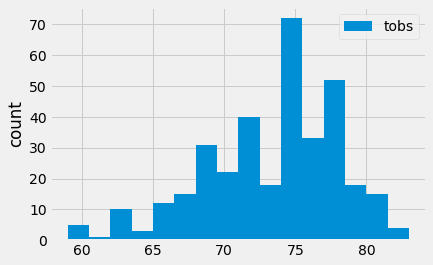

In [149]:
# plot data as histogram
plt.hist(lastYearMostAciveTobsClean, bins=16)
plt.ylabel('count')
plt.legend(['tobs'])
plt.show()

# Close session

In [ ]:
# Close Session
session.close()